In [1]:
import konlpy
import gensim
import sklearn
import seaborn
import os

import numpy as np
from numpy import dot
from numpy.linalg import norm

# STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [3]:
print('synopsis.txt 토큰화 개수: {}개'.format(len(tokenized)))

synopsis.txt 토큰화 개수: 71156개


# STEP 2. 추출된 결과로 embedding model 만들기

## 1. Word2Vec

In [4]:
from gensim.models import Word2Vec

#model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  

### 여기서 Word2Vec의 하이퍼파라미터는 다음과 같다.

- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0는 CBOW, 1은 Skip-gram.

### 1) CBOW 

In [5]:
# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model_cbow = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  

In [6]:
model_cbow.wv.most_similar(positive=['공포'])

[('현상', 0.8816644549369812),
 ('혼란', 0.8492339253425598),
 ('미스터리', 0.8435373902320862),
 ('극도', 0.8214647173881531),
 ('실체', 0.8124906420707703),
 ('불안', 0.8022640347480774),
 ('진실', 0.8021025657653809),
 ('소용돌이', 0.800876796245575),
 ('혼돈', 0.7998000383377075),
 ('미궁', 0.7905065417289734)]

In [7]:
model_cbow.wv.most_similar(positive=['드라마'])

[('영화로', 0.9476891756057739),
 ('코미디', 0.9451098442077637),
 ('코믹', 0.9290702939033508),
 ('주제', 0.9229808449745178),
 ('스토리', 0.9208139181137085),
 ('소재', 0.9197803139686584),
 ('유머', 0.9130331873893738),
 ('형식', 0.912163257598877),
 ('감동', 0.9098063707351685),
 ('판타지', 0.9087377190589905)]

In [8]:
model_cbow.wv.most_similar(positive=['사랑'])

[('첫사랑', 0.7009838223457336),
 ('애정', 0.6904664635658264),
 ('만남', 0.6889879703521729),
 ('우정', 0.68681800365448),
 ('운명', 0.6822293400764465),
 ('행복', 0.6821461915969849),
 ('연애', 0.6801673769950867),
 ('가슴', 0.6784487962722778),
 ('진심', 0.677764356136322),
 ('이별', 0.6745288968086243)]

### 2) Skip-gram

In [9]:
model_sg = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=1)  

In [10]:
model_sg.wv.most_similar(positive=['공포'])

[('소름', 0.7634444236755371),
 ('징후', 0.7320382595062256),
 ('엄습', 0.7312825918197632),
 ('극도', 0.7289994955062866),
 ('환각', 0.7283061742782593),
 ('혼돈', 0.7283008098602295),
 ('혼령', 0.7229591608047485),
 ('괴기', 0.7224207520484924),
 ('광기', 0.7205642461776733),
 ('괴담', 0.7175443172454834)]

In [11]:
model_sg.wv.most_similar(positive=['드라마'])

[('코믹', 0.8494331240653992),
 ('수작', 0.8450980186462402),
 ('영화로', 0.8347231149673462),
 ('휴먼', 0.826644778251648),
 ('코미디', 0.825643002986908),
 ('희극', 0.8238294720649719),
 ('멜로', 0.8160691857337952),
 ('블랙코미디', 0.814423143863678),
 ('극영화', 0.8138425350189209),
 ('나레이션', 0.797196090221405)]

In [12]:
model_sg.wv.most_similar(positive=['사랑'])

[('삼각관계', 0.6843813061714172),
 ('마르코', 0.6831241250038147),
 ('타이밍', 0.6783453822135925),
 ('짊어지', 0.6699199080467224),
 ('해피엔딩', 0.6639875769615173),
 ('설레임', 0.65911465883255),
 ('젊음', 0.6563576459884644),
 ('로미오', 0.6554620265960693),
 ('소울메이트', 0.6534028649330139),
 ('진심', 0.6522775292396545)]

## vector_size 의 영향 확인하기

### 1) CBOW, vector_size=300

In [13]:
model_cbow_size300 = Word2Vec(tokenized, vector_size=300, window=5, min_count=3, sg=0)  

In [14]:
model_cbow_size300.wv.most_similar(positive=['공포'])

[('현상', 0.8737897872924805),
 ('혼란', 0.8564962148666382),
 ('실체', 0.8345285058021545),
 ('진실', 0.8253214359283447),
 ('미스터리', 0.8217014074325562),
 ('미궁', 0.8108199834823608),
 ('소용돌이', 0.8059908151626587),
 ('극도', 0.8027533888816833),
 ('광기', 0.7981998920440674),
 ('초자연적', 0.7978798747062683)]

In [15]:
model_cbow_size300.wv.most_similar(positive=['사랑'])

[('진심', 0.7127841114997864),
 ('애정', 0.7000278234481812),
 ('만남', 0.699159562587738),
 ('연애', 0.6976047158241272),
 ('세츠코', 0.6930647492408752),
 ('첫사랑', 0.6899194717407227),
 ('행복', 0.6882714033126831),
 ('이별', 0.6823956966400146),
 ('존경심', 0.6818589568138123),
 ('운명', 0.6768602132797241)]

### 2) Skip-gram, vector_size=300

In [16]:
model_sg_size300 = Word2Vec(tokenized, vector_size=300, window=5, min_count=3, sg=1)  

In [17]:
model_sg_size300.wv.most_similar(positive=['공포'])

[('극도', 0.7250657081604004),
 ('엄습', 0.7232471108436584),
 ('혼령', 0.719109058380127),
 ('소름', 0.7183713912963867),
 ('환각', 0.7135828137397766),
 ('두려움', 0.7133579254150391),
 ('불안', 0.6938701272010803),
 ('괴기', 0.6935688257217407),
 ('불안감', 0.6893593072891235),
 ('징후', 0.6850590705871582)]

In [18]:
model_sg_size300.wv.most_similar(positive=['사랑'])

[('삼각관계', 0.6276111006736755),
 ('마르코', 0.6257237195968628),
 ('진심', 0.6241199374198914),
 ('로미오', 0.605178952217102),
 ('해피엔딩', 0.6034043431282043),
 ('타이밍', 0.5987192392349243),
 ('젊음', 0.598315954208374),
 ('동등', 0.5976152420043945),
 ('구애', 0.5940024256706238),
 ('짊어지', 0.5920853614807129)]

## window_size의 영향 확인하기

### 1) CBOW, window

In [19]:
model_cbow_window = Word2Vec(tokenized, vector_size=100, window=3, min_count=3, sg=0)  

In [20]:
model_cbow_window.wv.most_similar(positive=['공포'])

[('현상', 0.863472044467926),
 ('혼란', 0.853343665599823),
 ('미스터리', 0.8450877070426941),
 ('극도', 0.8315221071243286),
 ('불안', 0.8275124430656433),
 ('실체', 0.8158162832260132),
 ('그림자', 0.8113927245140076),
 ('소용돌이', 0.8097884654998779),
 ('두려움', 0.8049400448799133),
 ('혼돈', 0.8019477128982544)]

In [21]:
model_cbow_window.wv.most_similar(positive=['사랑'])

[('첫사랑', 0.7315732836723328),
 ('행복', 0.705996572971344),
 ('진심', 0.7030820250511169),
 ('연애', 0.6925846338272095),
 ('가슴', 0.6908726096153259),
 ('열정', 0.6895402669906616),
 ('애정', 0.6852291822433472),
 ('재회', 0.6824396252632141),
 ('그리움', 0.681056797504425),
 ('관계', 0.6799020171165466)]

### 2) Skip-gram, window

In [22]:
model_sg_window = Word2Vec(tokenized, vector_size=100, window=3, min_count=3, sg=1)  

In [23]:
model_sg_window.wv.most_similar(positive=['공포'])

[('광기', 0.7558827996253967),
 ('환각', 0.7509889006614685),
 ('불안', 0.7484691143035889),
 ('극도', 0.7462623715400696),
 ('징후', 0.7407838106155396),
 ('엄습', 0.7400770783424377),
 ('혼돈', 0.7383862137794495),
 ('증폭', 0.7334837317466736),
 ('출구', 0.7224185466766357),
 ('환영', 0.7219017744064331)]

In [24]:
model_sg_window.wv.most_similar(positive=['사랑'])

[('삼각관계', 0.6546497344970703),
 ('인연', 0.6374243497848511),
 ('진심', 0.6340097784996033),
 ('짊어지', 0.6324462890625),
 ('재결합', 0.6304972171783447),
 ('행복', 0.6303399205207825),
 ('맹목', 0.628968358039856),
 ('배려', 0.6272339224815369),
 ('서약', 0.6257610321044922),
 ('타이밍', 0.6251264214515686)]

### 다른 txt 파일로 Word2Vec 해보기

In [25]:
def data_word2vec(file_name):
    okt = Okt()          
    tokenized = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            res = []
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"] 명사추출
                    res.append((word[0]))
            tokenized.append(res)
    return tokenized

In [26]:
sf = data_word2vec('synopsis_SF.txt')

synopsis_SF.txt 파일을 읽고 있습니다.


In [27]:
model_sf = Word2Vec(sf, vector_size=100, window=5, min_count=3, sg=0)

In [28]:
model_sf.wv.most_similar(positive=['공포'])

[('인간', 0.9908024072647095),
 ('지구', 0.9905628561973572),
 ('그', 0.9904924631118774),
 ('시스템', 0.9904560446739197),
 ('위', 0.9904212951660156),
 ('은', 0.9903865456581116),
 ('친구', 0.9903097748756409),
 ('전', 0.9902998805046082),
 ('알', 0.9902915954589844),
 ('날', 0.9902775883674622)]

In [29]:
model_sf.wv.most_similar(positive=['사랑'])

[('이', 0.9962810277938843),
 ('그', 0.9962785840034485),
 ('인류', 0.9961081743240356),
 ('인간', 0.9960852265357971),
 ('미래', 0.9960364103317261),
 ('수', 0.9960343837738037),
 ('속', 0.9960141777992249),
 ('위해', 0.9959987998008728),
 ('온', 0.9959647059440613),
 ('의', 0.9959050416946411)]

# STEP 3. target, attribute 단어 셋 만들기

## 1. 예술영화와 상업영화 비교

### 영화 구분

- synopsis_art.txt : 예술영화
- synopsis_gen.txt : 일반영화(상업영화)
- 그 외는 독립영화 등으로 분류됩니다.

In [30]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

def read_token(file_name):
    okt = Okt()          
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"] 명사추출
                    result.append((word[0]))
    return ' '.join(result)

In [31]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

In [32]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [33]:
print('예술 영화의 개수: {}'.format(len(art)))
print('상업 영화의 개수: {}'.format(len(gen)))

예술 영화의 개수: 620208
상업 영화의 개수: 3014815


### TF-IDF 사용하기

코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정하는 방법

- fit 명령어를 통해서 text 변수에 저장된 데이터를 학습합니다.
- 단어사전은 .vocabulary_ 명령어를 통해 출력이 가능합니다.

### TF-IDF 하이퍼파라미터
- min_df : min-df는 DF(document-frequency)의 최소 빈도값을 설정해주는 파라미터입니다. DF는 특정 단어가 나타나는 '문서의 수'를 의미합니다.


- analyzer : analyzer = 'word'로 설정시, 학습의 단위를 단어로 설정합니다. analyzer = 'char'로 설정시, 학습의 단위를 글자로 설정합니다.


- sublinear_tf : TF (Term-Frequency, 단어빈도) 값의 스무딩(smoothing) 여부를 결정하는 파라미터 입니다. (True/False)
    - 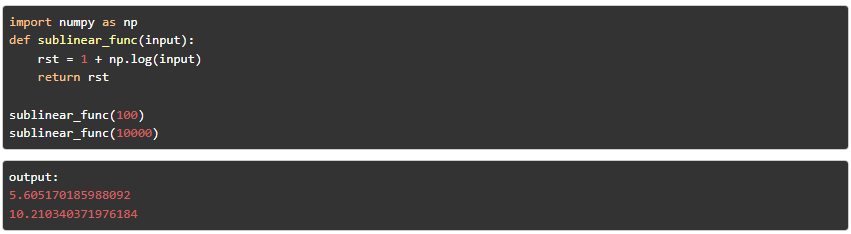
    이처럼 sublinear_tf는 높은 TF값을 완만하게 처리하는 효과를 가지고 있습니다.
    


- ngram_range : n-gram이라는 것은 단어의 묶음을 말합니다. 이 단어의 묶음을 범위를 설정하는 것이 ngram_range 파라미터입니다.


- max_features : max_feature는 tf-idf vector의 최대 feature를 설정해주는 파라미터입니다.




### max_features 예시

In [34]:
text = ['I go to my home my home is very large', 'I went out my home I go to the market', 'I bought a yellow lemon I go back to home', 'For years now, the people have been oppressed by a ruthless dictator.', 'This play is supported by a grant from the local arts council.']
print(text)

['I go to my home my home is very large', 'I went out my home I go to the market', 'I bought a yellow lemon I go back to home', 'For years now, the people have been oppressed by a ruthless dictator.', 'This play is supported by a grant from the local arts council.']


In [35]:
vectorizer = TfidfVectorizer() 
a = vectorizer.fit_transform(text).toarray() 
a.shape

(5, 33)

In [36]:
vectorizer = TfidfVectorizer(max_features = 10) 
a = vectorizer.fit_transform(text).toarray() 
a.shape

(5, 10)

단어가 포함된 문서의 빈도가 3보다 높은 단어 중 상위 500개의 단어만 사용하려고 했으나 max_df corresponds to < documents than min_df 오류로 인해 min_df는 사용하지 않았습니다. 이후에 500개의 단어만 추려서 진행해본 결과 중복이 되는 단어들이 많아서 각각의 고유한 단어를 추출하는데 어려움이 생겨 추후에 진행할 때 오류가 발생해서 제거했습니다.

<span style="color:red">That error is telling you that your max_df value is less than the min_df value.</span>

In [37]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [38]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

출력 결과 양쪽에서 중복되는 단어가 많았습니다. 그래서 중복되는 단어를 제거하고 100개의 단어 중에 상위 15개의 단어만 출력하겠습니다.

In [40]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model_cbow.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model_cbow.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [41]:
print('예술영화: '+str(target_art))
print('-'*130)
print('상업영화: '+str(target_gen))

예술영화: ['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
----------------------------------------------------------------------------------------------------------------------------------
상업영화: ['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


### 장르 구분

- synopsis_SF.txt: SF
- synopsis_가족.txt: 가족
- synopsis_공연.txt: 공연
- synopsis_공포(호러).txt: 공포(호러)
- synopsis_기타.txt: 기타
- synopsis_다큐멘터리.txt: 다큐멘터리
- synopsis_드라마.txt: 드라마
- synopsis_멜로로맨스.txt: 멜로로맨스
- synopsis_뮤지컬.txt: 뮤지컬
- synopsis_미스터리.txt: 미스터리
- synopsis_범죄.txt: 범죄
- synopsis_사극.txt: 사극
- synopsis_서부극(웨스턴).txt: 서부극(웨스턴)
- synopsis_성인물(에로).txt: 성인물(에로)
- synopsis_스릴러.txt: 스릴러
- synopsis_애니메이션.txt: 애니메이션
- synopsis_액션.txt: 액션
- synopsis_어드벤처.txt: 어드벤처
- synopsis_전쟁.txt: 전쟁
- synopsis_코미디.txt: 코미디
- synopsis_판타지.txt: 판타지

In [42]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [43]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [44]:
for i in range(0, len(genre)):
    print('{}: {}'.format(genre_name[i],len(genre[i])))
print()
print('총 장르 개수: ',len(genre))

SF: 65038
가족: 23821
공연: 24369
공포(호러): 170697
기타: 147570
다큐멘터리: 477808
드라마: 1124761
멜로로맨스: 300036
뮤지컬: 10424
미스터리: 46534
범죄: 87649
사극: 10583
서부극(웨스턴): 2719
성인물(에로): 133364
스릴러: 127030
애니메이션: 369758
액션: 342982
어드벤처: 29205
전쟁: 25786
코미디: 321161
판타지: 35443

총 장르 개수:  21


In [45]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


### 각 장르 대표단어 추출

In [46]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model_cbow.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

# STEP 4. WEAT score 계산과 시각화

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F4tuP4%2Fbtrx0tCTTWh%2FUQAExpNuPkYG0MrGIdrCR1%2Fimg.png" align="left">

In [47]:
#코사인 유사도 구하는 함수
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

#weat_score의 분자를 구하는 함수
def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

#weat_score 구하는 함수
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [48]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([model_cbow.wv[word] for word in target_art])
Y = np.array([model_cbow.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model_cbow.wv[word] for word in attributes[i]])
        B = np.array([model_cbow.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [49]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.44423613
SF 공연 -0.3507738
SF 공포(호러) -0.65761745
SF 기타 0.37816137
SF 다큐멘터리 0.6123802
SF 드라마 -0.33980915
SF 멜로로맨스 -0.78705364
SF 뮤지컬 0.3549546
SF 미스터리 -0.685605
SF 범죄 -0.18387094
SF 사극 -0.80074054
SF 서부극(웨스턴) -0.35088497
SF 성인물(에로) -0.5643029
SF 스릴러 -0.513014
SF 애니메이션 0.4124538
SF 액션 -0.42573223
SF 어드벤처 -0.715351
SF 전쟁 0.2849087
SF 코미디 -0.38527244
SF 판타지 -0.12765267
가족 공연 0.12572743
가족 공포(호러) -0.1847955
가족 기타 0.73676735
가족 다큐멘터리 0.8237428
가족 드라마 0.170783
가족 멜로로맨스 -0.6536547
가족 뮤지컬 0.67753863
가족 미스터리 -0.3392927
가족 범죄 0.21139334
가족 사극 -0.13529631
가족 서부극(웨스턴) 0.3908214
가족 성인물(에로) -0.35056034
가족 스릴러 -0.16471483
가족 애니메이션 0.8635362
가족 액션 0.0934676
가족 어드벤처 -0.05788854
가족 전쟁 0.61012393
가족 코미디 0.17877583
가족 판타지 0.40044487
공연 공포(호러) -0.23160215
공연 기타 0.9594418
공연 다큐멘터리 0.9482069
공연 드라마 0.035473496
공연 멜로로맨스 -0.72086716
공연 뮤지컬 0.9043297
공연 미스터리 -0.35549602
공연 범죄 0.11561391
공연 사극 -0.36739144
공연 서부극(웨스턴) 0.11322896
공연 성인물(에로) -0.49051583
공연 스릴러 -0.20837043
공연 애니메이션 0.94856364
공연 액션 -0.0045174

<AxesSubplot:>

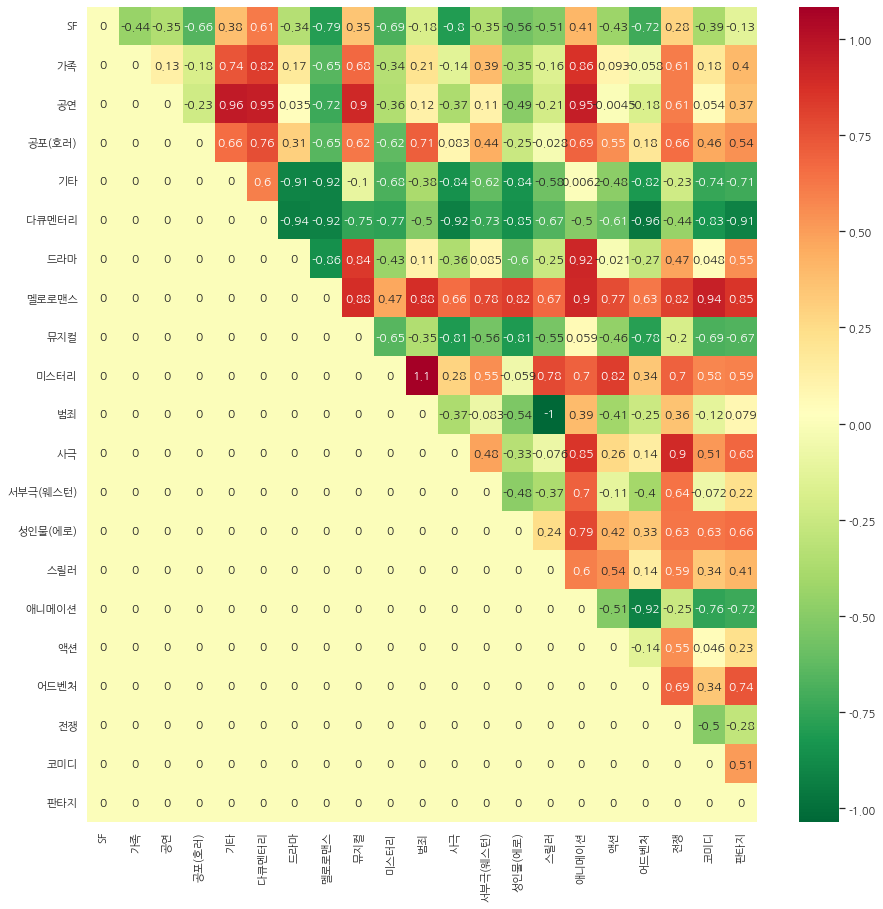

In [50]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

plt.figure(figsize=(15,15))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# 회고

cbow랑 skip-gram을 비교했을 때 대다수의 논문에서 skip-gram이 성능이 더 우수하다고 하는데 실험 결과는 cbow가 더 좋게 나왔다. 그 이유에 대해서 생각해본 결과 '공포','사랑'과 같은 단어는 문장에서 자주 등장하는 단어이기 때문에 주변 단어를 통해 중심 단어를 맞추는 skip-gram 보다 cbow처럼 중심 단어를 통해 주변 단어를 찾는 방법이 더 좋은 결과를 얻을 수 있었던 것 같다. 만약 희소성이 떨어지는 단어가 주어졌다면 skip-gram이 더 좋은 성능을 냈을 것이다.

vector_size를 늘린 결과 사랑을 입력했을 때 로미오, 친타와 같이 직관적으로 관련이 없을 것 같은 단어가 나왔습니다. vector_size를 무작정 늘리는 것이 결과에 안좋은 영향을 미친다는 것을 알았습니다. window 사이즈를 3으로 줄인 결과 아르튬, 안즈, 토마슈 같은 단어가 아닌 사랑에 관련된 단어를 얻을 수 있었으나 cbow에서 정확도가 많이 떨어졌습니다. skip-gram은 정확도가 올랐지만 사랑과는 연관성이 없는 단어들이 출력되었습니다. 적절한 window 크기 설정하는 것이 얼마나 중요한지 알 수 있었습니다. 그리고 이 실험을 통해 명사가 아닌 조사, 동사가 포함이 되어있는 것을 확인했습니다.

데이터가 상업 영화쪽 데이터가 월등히 많아서, 상업 영화쪽으로의 편향이 있었습니다. 히트맵을 분석해보면 0에 가까울수록 두 장르간 편향성이 없다고 볼 수 있습니다. 초록색이 진할수록 예술영화에 가깝고 붉은색이 진할수록 상업영화에 가깝습니다. 

### SF, 가족, 공포(호러) 장르에 대해서 +- 0.7을 기준으로 분석했습니다.

- SF 장르와 로멘스, 사극, 어드벤처 장르들은 예술영화로 편향되어 있습니다.
- 가족 장르와 기타, 다큐멘터리, 애니메이션 장르들은 상업영화에 편향되어 있습니다.
- 공연 장르와 기타, 다큐멘터리, 뮤지컬, 애니메이션 장르들은 상업영화에 편향되어 있습니다. 하지만 멜로 장르는 예술영화에 편향되어 있습니다.
- 공포 장르와 다큐멘터리, 범죄 장르들은 상업영화에 편향되어 있습니다.

### 예술영화와 상업영화

1) 상업영화 : 영화의 메카인 헐리우드의 대부분의 영화들이 그렇듯 가장 주체가 영화에 있어 가장 중요시 되는 부분이 흥행과 자본이라는 점이다. 자본주의적인 성격을 띄며 영화에 있어서는 감독과 연출의 표현하고자 하는 예술관이나 의도 보다는 관객들의 흥미를 이끌 수 있는 재미를 줌으로써 흥행이 목표인 영화의 종류이다.
대체적인 특징으론 관객에게 영화를 보면서 이해나 생각의 틈과 기회를 부여한다기 보단 주입식의 내용전달을 하는 특징을 갖고 있다. 따라서 장르가 확연히 분간되는 특성을 갖고 있다.

2) 예술영화 : 가장 큰 차이점이자 특징이라 말 할 수 있는 점은 대중오락적인 흥행성을 염두에 두지 않고 감독이 보여주고자 하는 가치관이나 예술관을 염려하여 비교적 상업영화보단 예술적인 가치에 중점을 두고 제작되는 영화를 이야기 한다.
전개 자체가 스토리를 중시하는 상업영화와는 다르게 사회적이며 심리적인 현상에 중점을 두며 실험영화, 독립영화, 작가주의의 영화들이 이에 해당된다.
대체로 이런 영화들은 거대 자본으로부터 벗어나 있고 상업적인 흥행보다는 작품성과 작가성에 의존하고 고전적인 내러티브에서 벗어난 분산적이거나 일관된 이야기 구성과 영웅적이지 않은 평범한 주인공이 등장하는 특징을 갖고 있다.

히트맵을 통해 예술영화에 많이 편향된 장르는 SF, 기타, 다큐멘터리였고 상업영화에 편향된 장르들을 분석한 결과 예술영화와도 어느정도 편향된 것으로 나타났다. 상업영화로 편향이 집중된 장르는 없었습니다. 그리고 SF장르는 내가 알기에 상업적인 영화가 많은데 예술영화로 나와서 결과를 믿을 수 없었습니다. 그 이유로 생각해본 것은 TF-IDF를 진행하는 과정에서 빈도수가 많은 단어만 간추려서 사용했어야하는데 모든 단어를 학습해서 이런 결과가 나온 것 같습니다.

# 참고

- [TF-IDF](https://wikidocs.net/31698)
- [TF-IDF 하이퍼파라미터](https://chan-lab.tistory.com/27) 
- [TF-IDF 하이퍼파라미터 오류해결](https://stackoverflow.com/questions/39828369/max-df-corresponds-to-documents-than-min-df-error-in-ridge-classifier) 

- [데이터의 편향성](https://www.hankyung.com/it/article/201902200481g)
- [관련논문](https://arxiv.org/pdf/2111.07864.pdf)
- [예술영화 상업영화](http://report.kyobobook.co.kr/view/2013/11752522/)